In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'C:\Users\NANDINI\Downloads\ds_5\US_Accidents_March23.csv')

In [4]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
print(df.columns)

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [6]:
# Replace 'date_column', 'time_column', and 'weather_column' with actual column names
df = df.dropna(subset=['Start_Time', 'Weather_Condition'])

In [7]:
# Convert to datetime (adjust column names accordingly)
df['date_time'] = pd.to_datetime(df['Start_Time'])

In [8]:
# Extract date and time components
df['date'] = df['date_time'].dt.date
df['hour'] = df['date_time'].dt.hour

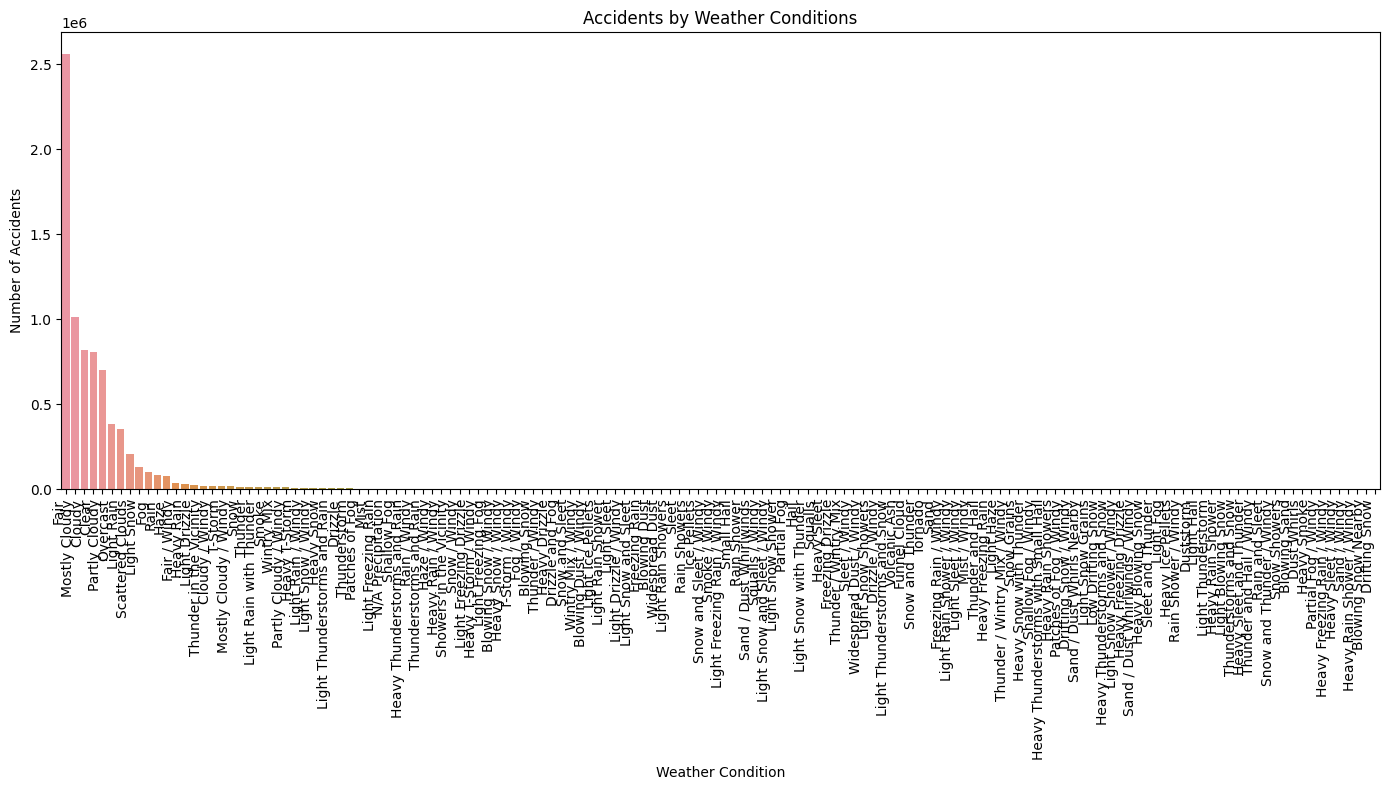

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze by weather conditions
weather_condition_counts = df['Weather_Condition'].value_counts()

# Visualize weather conditions
plt.figure(figsize=(14, 8))  # Increase figure size for better readability
sns.barplot(x=weather_condition_counts.index, y=weather_condition_counts.values)
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90, fontsize=10, ha='right')  # Rotate and adjust fontsize and alignment
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()


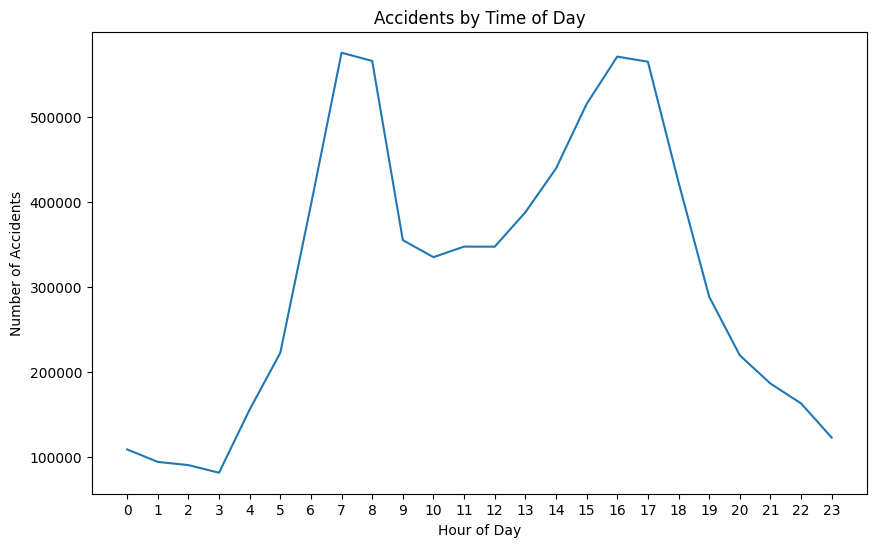

In [11]:
# Analyze by time of day
hourly_accidents = df['hour'].value_counts().sort_index()

# Visualize time of day
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_accidents.index, y=hourly_accidents.values)
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.show()

In [13]:
import folium


In [14]:
from folium.plugins import HeatMap

In [15]:
# Ensure 'Start_Lat' and 'Start_Lng' are the correct column names for latitude and longitude
m = folium.Map(location=[df['Start_Lat'].mean(), df['Start_Lng'].mean()], zoom_start=6)


In [19]:

# Convert 'Start_Time' to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Filter data for the year 2020 (optional)
df_2020 = df[df['Start_Time'].dt.year == 2020]

# Ensure 'Start_Lat' and 'Start_Lng' are the correct column names for latitude and longitude
lat_lng_data = df_2020[['Start_Lat', 'Start_Lng']].dropna()

# Create a map centered at an average location
m = folium.Map(location=[lat_lng_data['Start_Lat'].mean(), lat_lng_data['Start_Lng'].mean()], zoom_start=6)

# Prepare data for heatmap
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in lat_lng_data.iterrows()]

# Add heatmap to the map
HeatMap(heat_data).add_to(m)

# Save the map to an HTML file
m.save('accident_hotspots.html')